<a href="https://colab.research.google.com/github/thierryxdp/BibliotecaCN/blob/main/C%C3%B3pia_de_LimpezaDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install scikit-posthocs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import scikit_posthocs as sp

In [ ]:
data = pd.read_csv('data-t1.csv',header=0)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Limpeza de Dados e Pré-processamento


In [ ]:
# Começa pré-processamento de dados para limpar o dataset.

# Analisa quantidade de colunas e linhas
lines_qnt, columns_qnt = data.shape
print(lines_qnt, 'linhas e', columns_qnt, 'colunas.')

569 linhas e 33 colunas.


In [ ]:
# Primeiro, verifica se existem valores faltando

# Porcentagem de valores faltantes em cada atributo

data.isnull().sum()/len(data)*100

id                           0.0
diagnosis                    0.0
radius_mean                  0.0
texture_mean                 0.0
perimeter_mean               0.0
area_mean                    0.0
smoothness_mean              0.0
compactness_mean             0.0
concavity_mean               0.0
concave points_mean          0.0
symmetry_mean                0.0
fractal_dimension_mean       0.0
radius_se                    0.0
texture_se                   0.0
perimeter_se                 0.0
area_se                      0.0
smoothness_se                0.0
compactness_se               0.0
concavity_se                 0.0
concave points_se            0.0
symmetry_se                  0.0
fractal_dimension_se         0.0
radius_worst                 0.0
texture_worst                0.0
perimeter_worst              0.0
area_worst                   0.0
smoothness_worst             0.0
compactness_worst            0.0
concavity_worst              0.0
concave points_worst         0.0
symmetry_w

In [ ]:
# remove coluna Unnamed e id
data = data.drop('Unnamed: 32', axis=1)
data = data.drop('id', axis=1)
lines_qnt, columns_qnt = data.shape
print(lines_qnt, 'linhas e', columns_qnt, 'colunas.')

569 linhas e 31 colunas.


In [ ]:
# Remove linhas duplicadas
data = data.drop_duplicates()
lines_qnt, columns_qnt = data.shape
print(lines_qnt, 'linhas e', columns_qnt, 'colunas.')

569 linhas e 31 colunas.


Não foram encontradas linhas duplicadas no dataset.

Agora, vamos dividir o dataset entre Treinamento e Teste. 
Em seguida, vamos remover outliers e atributos com baixa variância
para analisar se melhoramos o desempenho da regressão em prever
os exemplos de teste selecionados.

In [ ]:
# Separando em amostra de treinamento e amostra de teste.
# Em específico, faremos 2/3 para treino e 1/3 para teste

X = data.drop(columns='diagnosis')
y = data.loc[:, ['diagnosis']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 2/3)

In [ ]:
# Verificando se separou corretamente em 2/3 e 1/3

lines_qnt, columns_qnt = X_train.shape
print('X_train ', lines_qnt, 'linhas e', columns_qnt, 'colunas.')
lines_qnt, columns_qnt = X_test.shape
print('X_test ', lines_qnt, 'linhas e', columns_qnt, 'colunas.')
lines_qnt, columns_qnt = y_train.shape
print('y_train ', lines_qnt, 'linhas e', columns_qnt, 'colunas.')
lines_qnt, columns_qnt = y_test.shape
print('y_test ', lines_qnt, 'linhas e', columns_qnt, 'colunas.')

X_train  379 linhas e 30 colunas.
X_test  190 linhas e 30 colunas.
y_train  379 linhas e 1 colunas.
y_test  190 linhas e 1 colunas.


# Aplicando Regressão Logística inicial para ter como parâmetro

In [ ]:
# Muda para valores binários
def convertToBinary(value):
  if value == 'B':
    return 0
  else:
    return 1

y_train = np.array(list(map(convertToBinary, y_train.to_numpy())))
y_test = np.array(list(map(convertToBinary, y_test.to_numpy())))

In [ ]:
def apply_logistic_regression(X_train, X_test, y_train, y_test):
  model = LogisticRegression(max_iter = 10000).fit(X_train,y_train)
  predictions = model.predict(X_test)
  cm = metrics.confusion_matrix(y_test, predictions)

  plt.figure(figsize=(9,9))
  sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print("Acurácia:", metrics.accuracy_score(y_test.tolist(), predictions))
  print("Precisão:", metrics.precision_score(y_test.tolist(), predictions, average='binary'))
  print("Recall:", metrics.recall_score(y_test.tolist(), predictions, average='binary'))
  print("F1-score:", metrics.f1_score(y_test.tolist(), predictions, average='binary'))

Acurácia: 0.968421052631579
Precisão: 0.9428571428571428
Recall: 0.9705882352941176
F1-score: 0.9565217391304348


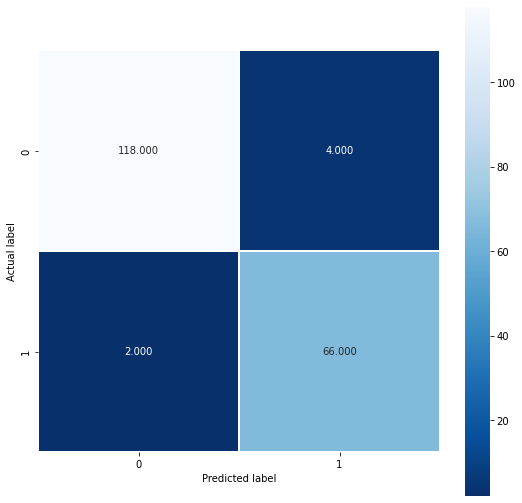

In [ ]:
apply_logistic_regression(X_train, X_test, y_train, y_test)

# Removendo Atributos com Baixa Variância e Analisando Resultados

In [ ]:
# Vamos agora aplicar o filtro de atributos com variância próximo ou igual a zero

# Vamos normalizar os dados para calcular a variância dos atributos
d = preprocessing.normalize(X_train, axis=0)
data_scaled = pd.DataFrame(d, columns=X_train.columns)

# Calculando a variância
data_scaled.var()

radius_mean                0.000159
texture_mean               0.000122
perimeter_mean             0.000176
area_mean                  0.000617
smoothness_mean            0.000053
compactness_mean           0.000528
concavity_mean             0.001167
concave points_mean        0.001004
symmetry_mean              0.000058
fractal_dimension_mean     0.000035
radius_se                  0.000910
texture_se                 0.000420
perimeter_se               0.000941
area_se                    0.001579
smoothness_se              0.000439
compactness_se             0.000900
concavity_se               0.001249
concave points_se          0.000579
symmetry_se                0.000360
fractal_dimension_se       0.000885
radius_worst               0.000217
texture_worst              0.000140
perimeter_worst            0.000235
area_worst                 0.000795
smoothness_worst           0.000079
compactness_worst          0.000708
concavity_worst            0.000934
concave points_worst       0

In [ ]:
# Testaremos a regressão logística aplicando alguns thresholders
# Em seguida, analiseremos qual foi melhor.
# Vamos analisar se removendo atributos temos um desempenho melhor
# e quantos atributos serão necessários remover se realmente melhorar o desempenho

In [ ]:
# Vamos guardar as variâncias e aplicar o filtro de variância

def calculate_logistic_regression_with_threshold(X_train, X_test, y_train, y_test, data_scaled, threshold):
  variance = data_scaled.var()
  columns = X_train.columns

  #saving the names of variables having variance more than a threshold value

  variable = []

  for i in range(0,len(variance)):
      if variance[i]>=threshold: # threshold
          variable.append(columns[i])

  print(len(variable), "features consideradas: ", variable)
  data_train = X_train[variable]
  data_test = X_test[variable]
  apply_logistic_regression(data_train, data_test, y_train, y_test)

30 features consideradas:  ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Acurácia: 0.968421052631579
Precisão: 0.9428571428571428
Recall: 0.9705882352941176
F1-score: 0.9565217391304348


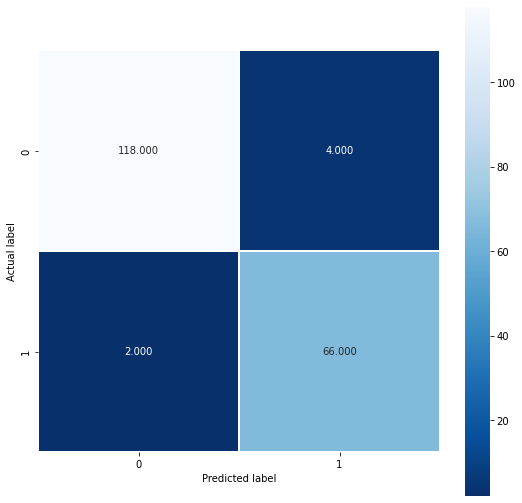

In [ ]:
# Aplicando threshold de 1e-5
calculate_logistic_regression_with_threshold(X_train, X_test, y_train, y_test, data_scaled, 1e-5)

29 features consideradas:  ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Acurácia: 0.968421052631579
Precisão: 0.9428571428571428
Recall: 0.9705882352941176
F1-score: 0.9565217391304348


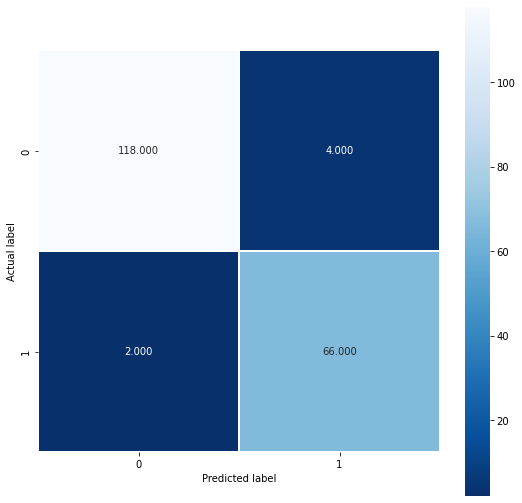

In [ ]:
# Aplicando threshold de 5e-5
calculate_logistic_regression_with_threshold(X_train, X_test, y_train, y_test, data_scaled, 5e-5)

15 features consideradas:  ['area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'fractal_dimension_se', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']
Acurácia: 0.9736842105263158
Precisão: 0.9565217391304348
Recall: 0.9705882352941176
F1-score: 0.9635036496350365


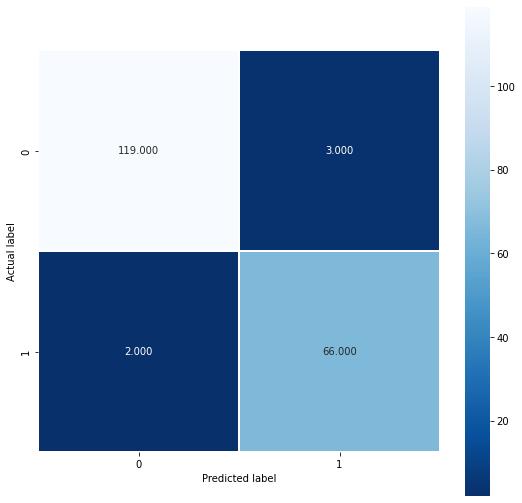

In [ ]:
# Aplicando threshold de 5e-4
calculate_logistic_regression_with_threshold(X_train, X_test, y_train, y_test, data_scaled, 5e-4)

17 features consideradas:  ['area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'fractal_dimension_se', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']
Acurácia: 0.9789473684210527
Precisão: 0.9705882352941176
Recall: 0.9705882352941176
F1-score: 0.9705882352941176


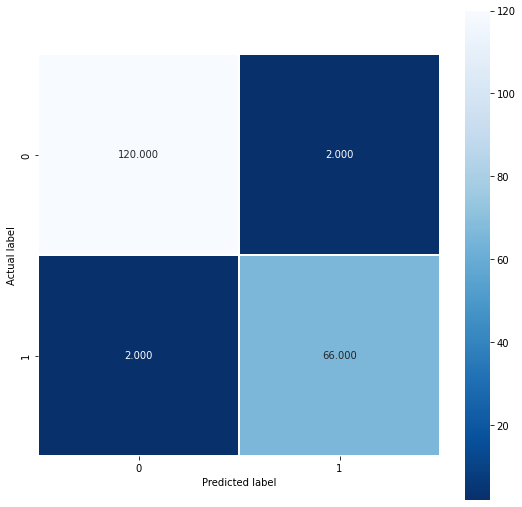

In [ ]:
# Aplicando threshold de 4e-4
calculate_logistic_regression_with_threshold(X_train, X_test, y_train, y_test, data_scaled, 4e-4)

18 features consideradas:  ['area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']
Acurácia: 0.9789473684210527
Precisão: 0.9705882352941176
Recall: 0.9705882352941176
F1-score: 0.9705882352941176


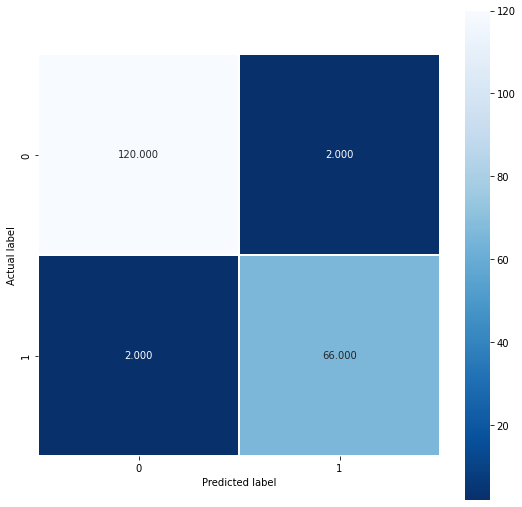

In [ ]:
# Aplicando threshold de 3e-4
calculate_logistic_regression_with_threshold(X_train, X_test, y_train, y_test, data_scaled, 3e-4)

20 features consideradas:  ['area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']
Acurácia: 0.9736842105263158
Precisão: 0.9436619718309859
Recall: 0.9852941176470589
F1-score: 0.9640287769784172


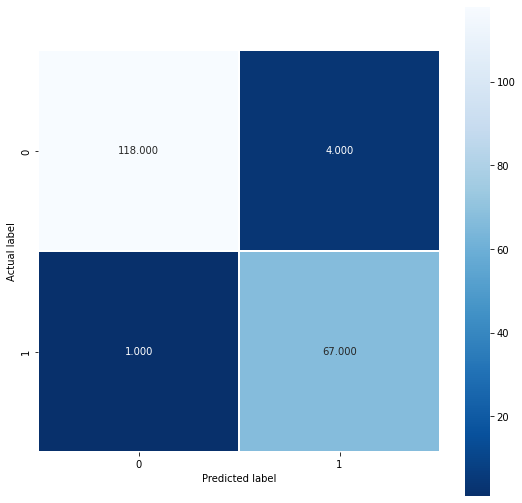

In [ ]:
# Aplicando threshold de 2e-4
calculate_logistic_regression_with_threshold(X_train, X_test, y_train, y_test, data_scaled, 2e-4)

26 features consideradas:  ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Acurácia: 0.968421052631579
Precisão: 0.9428571428571428
Recall: 0.9705882352941176
F1-score: 0.9565217391304348


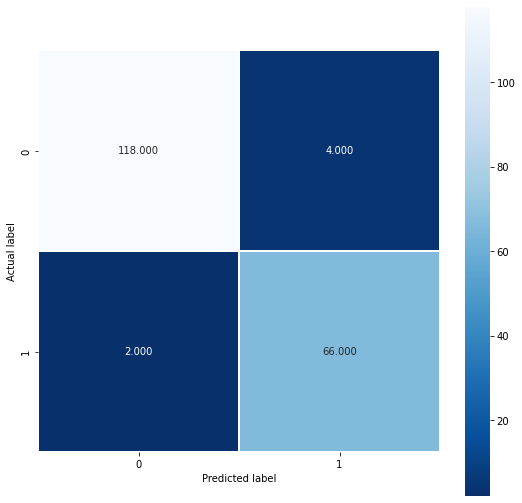

In [ ]:
# Aplicando threshold de 1e-4
calculate_logistic_regression_with_threshold(X_train, X_test, y_train, y_test, data_scaled, 1e-4)

4 features consideradas:  ['concavity_mean', 'concave points_mean', 'area_se', 'concavity_se']
Acurácia: 0.9
Precisão: 0.8769230769230769
Recall: 0.8382352941176471
F1-score: 0.8571428571428571


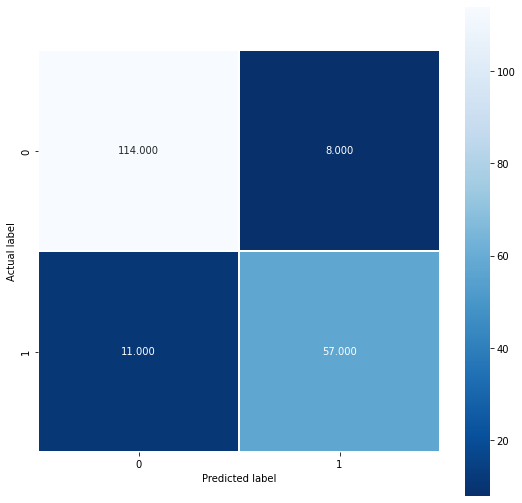

In [ ]:
# Aplicando threshhold de 1e-3
calculate_logistic_regression_with_threshold(X_train, X_test, y_train, y_test, data_scaled, 1e-3) 

Analisando os thresholds aplicados, vemos que com o threshold de 4e-4 tivemos o melhor resultado. Resultado melhor do que utilizando todos os atributos.

Então, usaremos daqui para frente os dados removendo os atributos com variância
maior que 4e-4.

17 features consideradas:  ['area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'fractal_dimension_se', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']
Acurácia: 0.9789473684210527
Precisão: 0.9705882352941176
Recall: 0.9705882352941176
F1-score: 0.9705882352941176


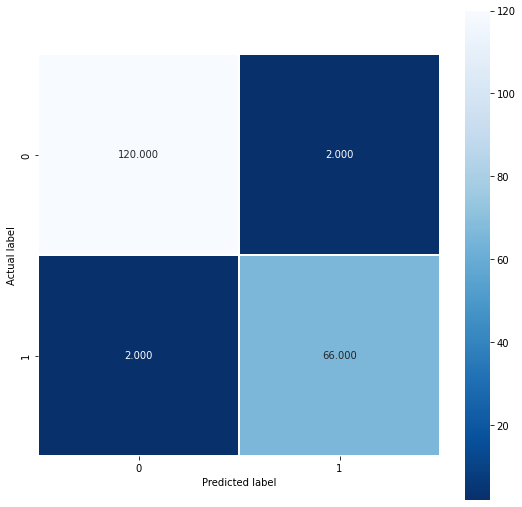

In [ ]:
# Aplicando threshold de 4e-4
calculate_logistic_regression_with_threshold(X_train, X_test, y_train, y_test, data_scaled, 4e-4)

In [ ]:
variance = data_scaled.var()
columns = X_train.columns

variable = []

for i in range(0,len(variance)):
    if variance[i]>=4e-4: # threshold
        variable.append(columns[i])

print(len(variable), "features consideradas: ", variable)

X_train = X_train[variable]
X_test = X_test[variable]

17 features consideradas:  ['area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'fractal_dimension_se', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']


# Analisando Distribuição dos Atributos

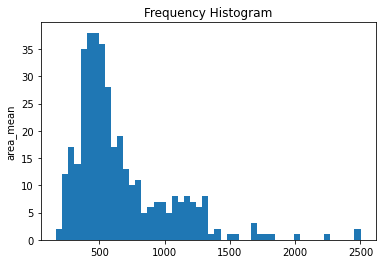

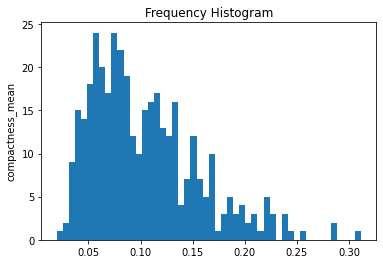

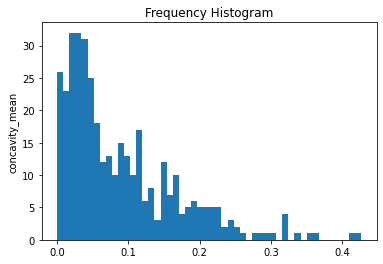

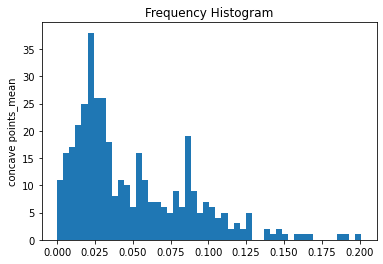

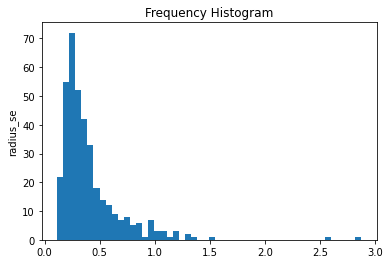

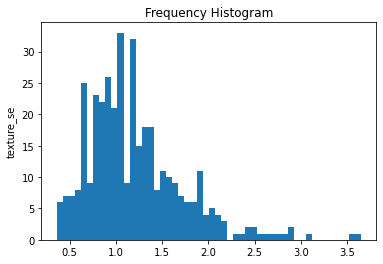

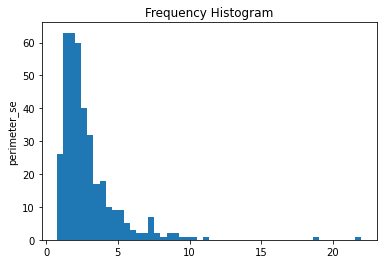

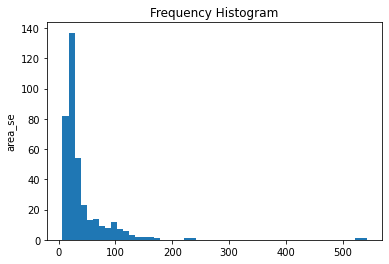

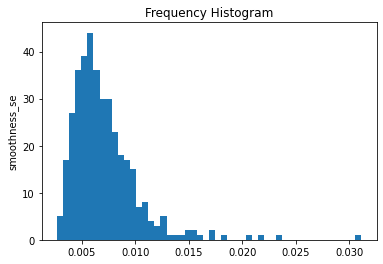

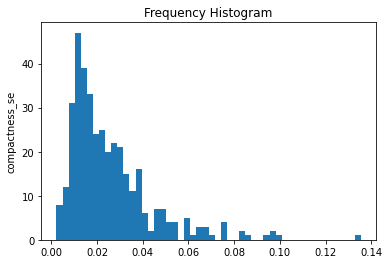

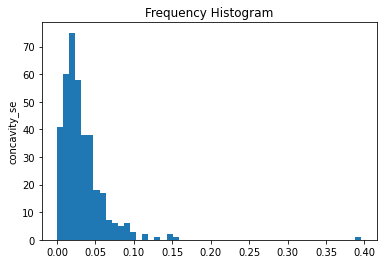

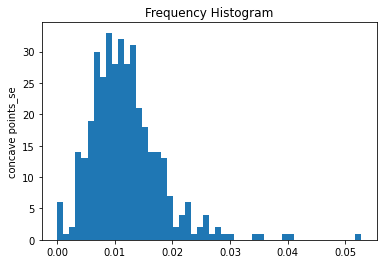

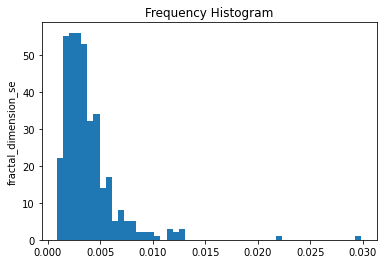

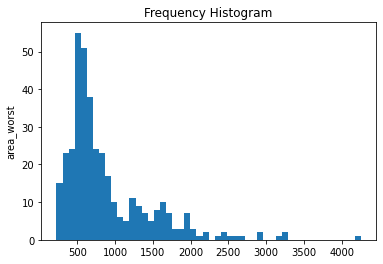

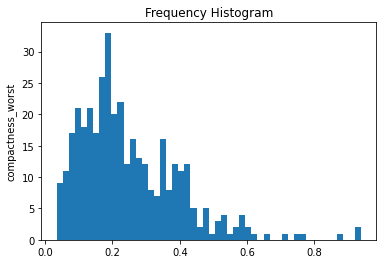

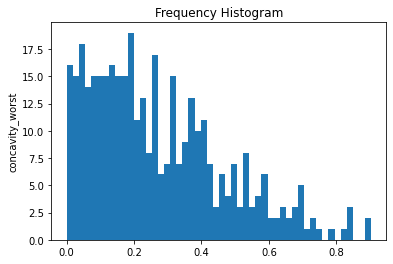

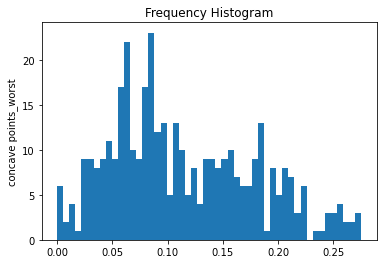

In [ ]:
for column in X_train.columns:
  plt.hist(np.array(X_train[column]), bins=50)
  plt.gca().set(title='Frequency Histogram', ylabel=column)
  plt.show()

Analisando a distribuição dos atributos, vemos que seguem distribuições normais. Algumas distribuições com menos variância que outras, mas em geral
seguem distribuições normais.

# Metódos Auxiliares

In [ ]:
def tirar_outliers(X_train, y_train):
  X_train = X_train.reset_index()
  X_train = X_train.drop(labels="index", axis=1)
  dataset = X_train.assign(diagnosis=y_train)
  for column in X_train.columns:
    outliers = sp.outliers_gesd(dataset[column], outliers = 20, hypo = True)
    outliers_index = []
    for i in range(0, len(outliers)):
      if (outliers[i] == True):
        outliers_index.append(i)
    dataset = dataset.drop(outliers_index)
    dataset = dataset.reset_index()
    dataset = dataset.drop(labels="index", axis=1)
  
  new_X = dataset.drop(columns='diagnosis')
  new_y = dataset.loc[:, ['diagnosis']]
  return new_X, new_y


In [ ]:
l, c = X_train.shape
print(str(l) + ' linhas e ' + str(c) + ' colunas.')
X_without_outliers, y_without_outliers = tirar_outliers(X_train, y_train)
l, c = X_without_outliers.shape
print(str(l) + ' linhas e ' + str(c) + ' colunas.')

379 linhas e 17 colunas.
326 linhas e 17 colunas.


# Seguindo o Roteiro Proposto em Aula

Acurácia: 0.9631578947368421
Precisão: 0.9552238805970149
Recall: 0.9411764705882353
F1-score: 0.9481481481481482


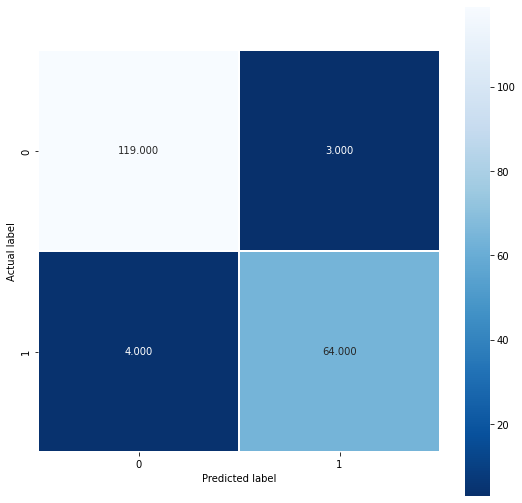

In [ ]:
# data set 1 - padronização e tirar outliers
scaler_train = preprocessing.StandardScaler().fit(X_train)
scaler_test = preprocessing.StandardScaler().fit(X_test)
X_scaled_train = scaler_train.transform(X_train)
X_scaled_test = scaler_test.transform(X_test)

ds1_X_train, ds1_y_train = tirar_outliers(pd.DataFrame(X_scaled_train), y_train)
apply_logistic_regression(X_scaled_train, X_scaled_test, y_train, y_test)

Acurácia: 0.9421052631578948
Precisão: 0.9130434782608695
Recall: 0.9264705882352942
F1-score: 0.9197080291970804


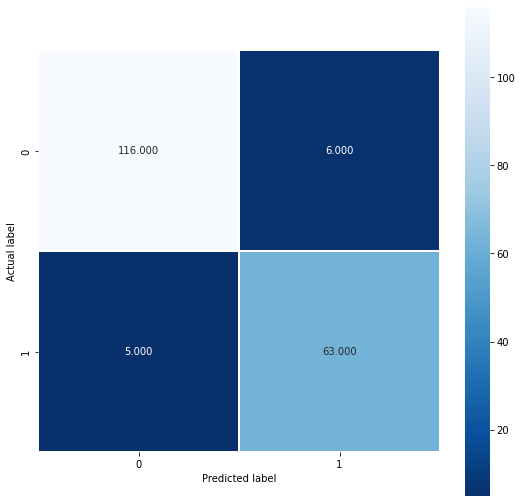

In [ ]:
# data set 2 - normalização e tirar outliers
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)

ds1_X_train, ds1_y_train = tirar_outliers(pd.DataFrame(X_train_minmax), y_train)
apply_logistic_regression(X_train_minmax, X_test_minmax, y_train, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia: 0.9526315789473684
Precisão: 1.0
Recall: 0.8676470588235294
F1-score: 0.9291338582677166


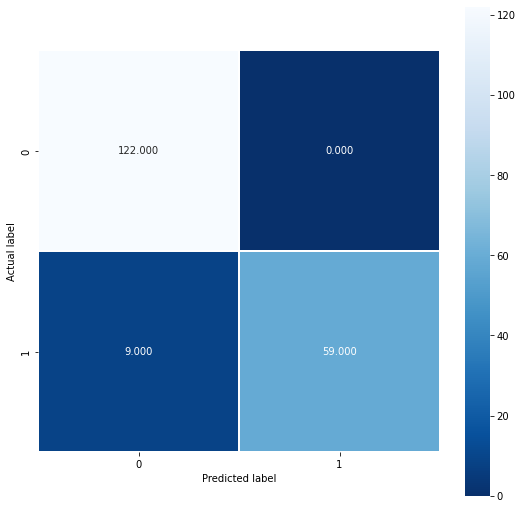

In [ ]:
# data set 3 - tirar outliers e padronização
ds1_X_train, ds1_y_train = tirar_outliers(X_train, y_train)

scaler_train = preprocessing.StandardScaler().fit(ds1_X_train)
scaler_test = preprocessing.StandardScaler().fit(X_test)
X_scaled_train = scaler_train.transform(ds1_X_train)
X_scaled_test = scaler_test.transform(X_test)


apply_logistic_regression(X_scaled_train, X_scaled_test, ds1_y_train, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia: 0.8894736842105263
Precisão: 0.9795918367346939
Recall: 0.7058823529411765
F1-score: 0.8205128205128206


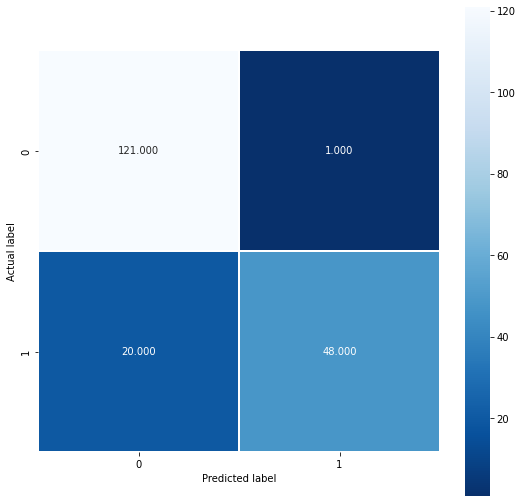

In [ ]:
# data set 4 - tirar outliers e normalização

ds1_X_train, ds1_y_train = tirar_outliers(X_train, y_train)

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(ds1_X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)


apply_logistic_regression(X_train_minmax, X_test_minmax, ds1_y_train, y_test)

Acurácia: 0.9421052631578948
Precisão: 0.9130434782608695
Recall: 0.9264705882352942
F1-score: 0.9197080291970804


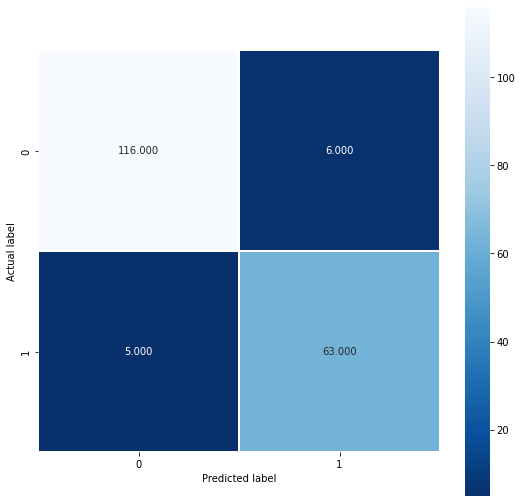

In [ ]:
# data set 5 - normalização

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)

apply_logistic_regression(X_train_minmax, X_test_minmax, y_train, y_test)

Acurácia: 0.9631578947368421
Precisão: 0.9552238805970149
Recall: 0.9411764705882353
F1-score: 0.9481481481481482


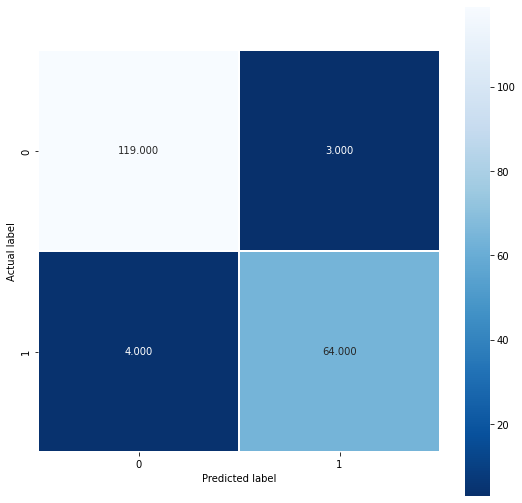

In [ ]:
# data set 6 - padronização

scaler_train = preprocessing.StandardScaler().fit(X_train)
scaler_test = preprocessing.StandardScaler().fit(X_test)
X_scaled_train = scaler_train.transform(X_train)
X_scaled_test = scaler_test.transform(X_test)

apply_logistic_regression(X_scaled_train, X_scaled_test, y_train, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia: 0.9842105263157894
Precisão: 1.0
Recall: 0.9558823529411765
F1-score: 0.9774436090225563


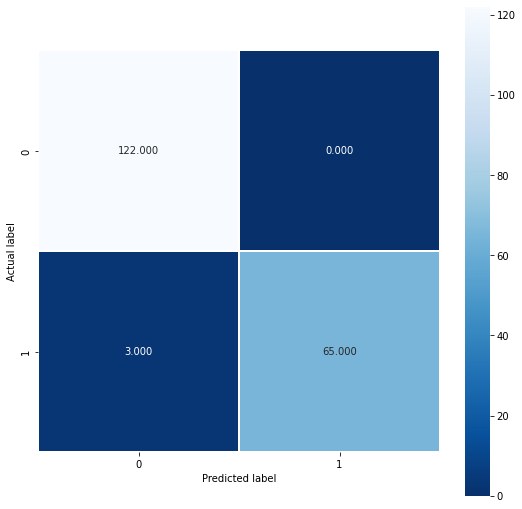

In [ ]:
# data set 7 - apenas tirando outliers

ds1_X_train, ds1_y_train = tirar_outliers(X_train, y_train)
apply_logistic_regression(ds1_X_train, X_test, ds1_y_train, y_test)